# Create a dataset description in Python

#### Setup

In [1]:
import sys
# redirect stderr to stdout for better output comparison across runs with 'pytest --nbval'
sys.stderr = sys.stdout

## Create `DatasetDescr` object 

In [2]:
from bioimageio.spec.dataset.v0_3 import (
    Author,
    CiteEntry,
    DatasetDescr,
    Doi,
    HttpUrl,
    LicenseId,
    OrcidId,
)

dataset = DatasetDescr(
    name="Kaggle 2018 Data Science Bowl",
    description="This image data set contains a large number of segmented nuclei images and was created for the Kaggle "
    "2018 Data Science Bowl sponsored by Booz Allen Hamilton with cash prizes. The image set was a testing ground "
    "for the application of novel and cutting edge approaches in computer vision and machine learning to the "
    "segmentation of the nuclei belonging to cells from a breadth of biological contexts.",
    documentation=HttpUrl(
        "https://uk1s3.embassy.ebi.ac.uk/public-datasets/examples.bioimage.io/dsb-2018.md"
    ),
    covers=[
        HttpUrl(
            "https://data.broadinstitute.org/bbbc/BBBC038/BBBC038exampleimage1.png"
        ),
        HttpUrl(
            "https://data.broadinstitute.org/bbbc/BBBC038/BBBC038exampleimage2.png"
        ),
        HttpUrl(
            "https://data.broadinstitute.org/bbbc/BBBC038/BBBC038exampleimage3.png"
        ),
        HttpUrl(
            "https://data.broadinstitute.org/bbbc/BBBC038/BBBC038exampleimage4.png"
        ),
        HttpUrl(
            "https://data.broadinstitute.org/bbbc/BBBC038/BBBC038exampleimage5.png"
        ),
    ],
    authors=[
        Author(
            name="Fynn Beuttenmueller",
            affiliation="EMBL",
            github_user="fynnbe",
            orcid=OrcidId("0000-0002-8567-6389"),
        ),
    ],
    source=HttpUrl("https://bbbc.broadinstitute.org/BBBC038/"),
    cite=[
        CiteEntry(
            text="Caicedo, J.C., Goodman, A., Karhohs, K.W. et al. Nucleus segmentation across imaging experiments: "
            "the 2018 Data Science Bowl. Nat Methods 16, 1247–1253 (2019).",
            doi=Doi("10.1038/s41592-019-0612-7"),
        ),
        CiteEntry(
            text="Allen Goodman, Anne Carpenter, Elizabeth Park, jlefman-nvidia, Josette_BoozAllen, Kyle, Maggie, "
            "Nilofer, Peter Sedivec, Will Cukierski. (2018). 2018 Data Science Bowl . Kaggle.",
            url=HttpUrl("https://kaggle.com/competitions/data-science-bowl-2018"),
        ),
    ],
    license=LicenseId("CC0-1.0"),
)
print(f"created description for '{dataset.name}'")
dataset.validation_summary.display()

created description for 'Kaggle 2018 Data Science Bowl'


🟡 
 bioimageio format validation 
 
 
 status 
 valid-format 
 
 
 source 
 in-memory 
 
 
 format version 
 dataset 0.3.0 
 
 
 bioimageio.spec 
 0.5.5.5 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `DatasetDescr` instance.

## Export dataset description for sharing (e.g. upload to bioimage.io)

In [3]:
from pathlib import Path

from bioimageio.spec import save_bioimageio_package

exported = save_bioimageio_package(
    dataset, output_path=Path("my_bioimageio_dataset.zip")
)
print(f"exported dataset description to {exported}")

exported dataset description to my_bioimageio_dataset.zip


## Load a dataset description

In [4]:
from bioimageio.spec import load_dataset_description

loaded = load_dataset_description(exported)
loaded.validation_summary.display()

🟡 
 bioimageio format validation 
 
 
 status 
 valid-format 
 
 
 source 
 my_bioimageio_dataset.zip 
 
 
 format version 
 dataset 0.3.0 
 
 
 bioimageio.spec 
 0.5.5.5 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `DatasetDescr` instance. 
 
 
 ✔️ 
 
 bioimageio.spec format validation dataset 0.3.0 
 
 
 ⚠ 
 tags 
 Needs to be filled for FAIR compliance

## Inspect a dataset description

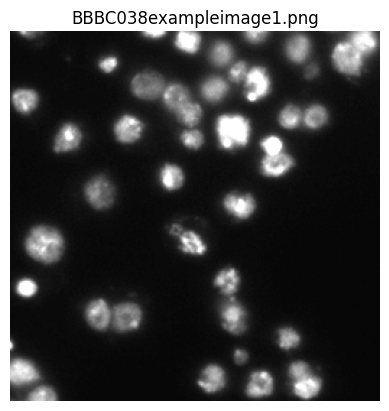

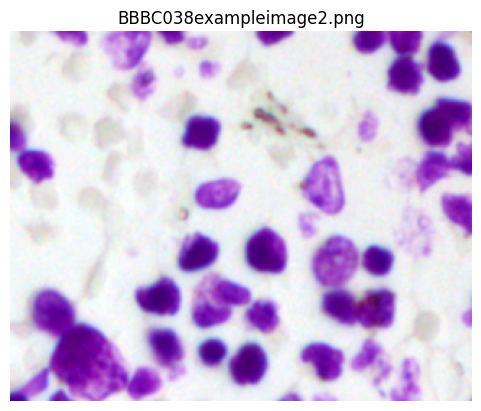

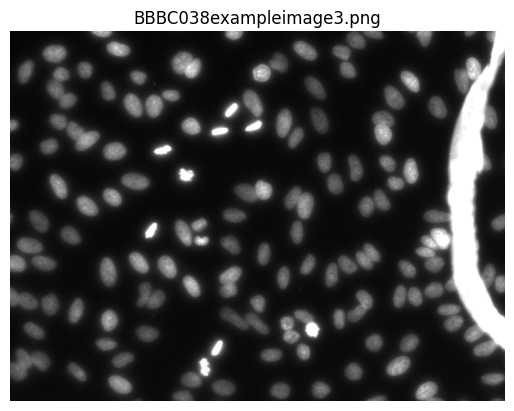

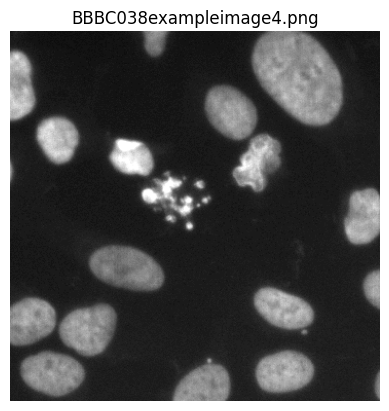

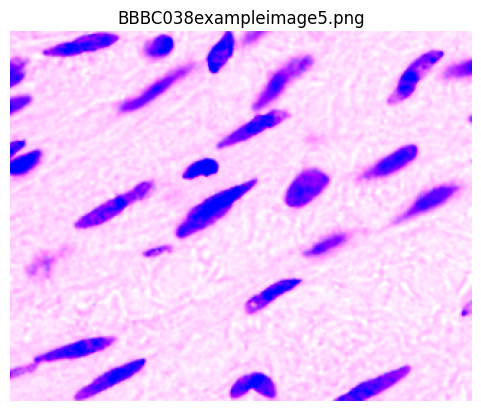

In [5]:
from typing import Any
import matplotlib.pyplot as plt
from imageio.v3 import imread  # pyright: ignore[reportUnknownVariableType]
from numpy.typing import NDArray

from bioimageio.spec.utils import get_reader

for cover in loaded.covers:
    reader = get_reader(cover)
    img: NDArray[Any] = imread(reader.read())
    _ = plt.imshow(img)
    _ = plt.title(reader.original_file_name)
    _ = plt.axis("off")
    _ = plt.show()